In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

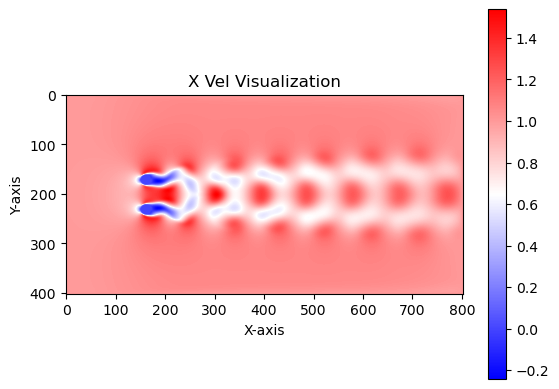

In [8]:
import matplotlib.pyplot as plt
import pyvista as pv
# Load the .vtr file
filename = 'Data/field000250.vtr'
data = pv.read(filename)
# display(data)
# df = pd.DataFrame(data.cell_data["CellType"])
# print(data.cell_data["Velocity"][:,0].shape)
plotdata = data.cell_data["Velocity"][:,0].reshape(402, 802)

plt.imshow(plotdata, cmap = 'bwr')
plt.colorbar()  # Add the color scale
plt.title("X Vel Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

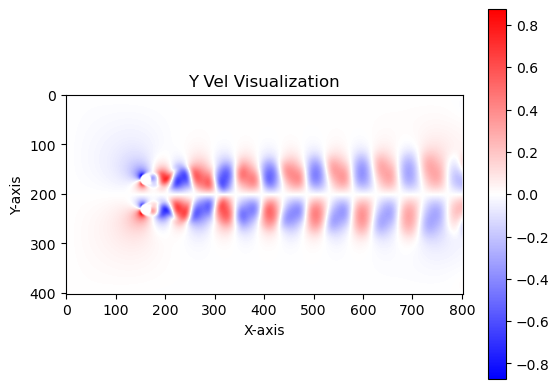

In [9]:
import matplotlib.pyplot as plt
import pyvista as pv
# Load the .vtr file
filename = 'Data/field000250.vtr'
data = pv.read(filename)
# display(data)
# df = pd.DataFrame(data.cell_data["CellType"])
# print(data.cell_data["Velocity"][:,0].shape)
plotdata = data.cell_data["Velocity"][:,1].reshape(402, 802)

plt.imshow(plotdata, cmap = 'bwr')
plt.colorbar()  # Add the color scale
plt.title("Y Vel Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# dataset split

In [1]:
import os
import shutil

def split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """Split .vtr files into train, test, and val directories."""
    # Ensure ratios sum to 1
    assert train_ratio + val_ratio + test_ratio == 1.0

    # Create output directories
    for split in ['train', 'test', 'val']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    # List all .vtr files
    files = [f for f in os.listdir(input_dir) if f.endswith(".vtr")]
    # random.shuffle(files)

    # Split files
    train_cutoff = int(len(files) * train_ratio)
    val_cutoff = train_cutoff + int(len(files) * val_ratio)

    splits = {
        "train": files[:train_cutoff],
        "val": files[train_cutoff:val_cutoff],
        "test": files[val_cutoff:]
    }

    # Move files to respective directories
    for split, split_files in splits.items():
        for file in split_files:
            shutil.copy(os.path.join(input_dir, file), os.path.join(output_dir, split, file))

    print("Dataset split complete.")
    for split, split_files in splits.items():
        print(f"{split}: {len(split_files)} files")


In [2]:
input_directory = "Data"
output_directory = "dataset"
split_dataset(input_directory, output_directory)

Dataset split complete.
train: 70 files
val: 15 files
test: 15 files


# dataset converter

In [1]:
import pyvista as pv
import numpy as np
import os
import h5py

In [5]:
def vtr_to_h5_split(input_dir, output_dir):
    """
    Convert .vtr files from train, test, and val directories to separate .h5 files.
    """
    for split in ['train', 'test', 'val']:
        split_dir = os.path.join(input_dir, split)
        output_path = os.path.join(output_dir, f"{split}.h5")
        index = 0
        with h5py.File(output_path, "w") as f:
            
            for _, file_name in enumerate(sorted(os.listdir(split_dir))):
                if file_name.endswith(".vtr"):
                    file_path = os.path.join(split_dir, file_name)
                    print(f"Processing: {file_path}")

                    # Read the .vtr file using PyVista
                    data = pv.read(file_path)

                    # Extract point-based coordinates for the grid
                    points = np.array(data.points)  # Shape: [num_points, 3]

                    # Extract x and y coordinates
                    pos = points[:, :2]  # Keep only x and y dimensions

                    # Extract data fields
                    density = data.cell_data.get("Density", None)
                    velocity = data.cell_data.get("Velocity", None)
                    cell_type = data.cell_data.get("CellType", None)

                    # Extract only v_x and v_y (first two components)
                    x_velocity = np.array(velocity)[:, 0]  
                    y_velocity = np.array(velocity)[:, 1]

                    # Create a group for this file in the HDF5 file
                    g = f.create_group(str(index))
                    g["cell_type"] = cell_type

                    # if density is not None:
                    #     g["density"] = density

                    if velocity is not None:
                        g["x_velocity"] = x_velocity
                        g["y_velocity"] = y_velocity
                    
                    # g["pos"] = pos  # Save positions in [num_points, 2] format

                    print(f"Saved dataset {file_name} in {split}.h5\n")
                    index += 1

        print(f"{split} dataset saved to: {output_path}")


In [6]:
import os

input_directory = "dataset"
output_directory = "dataset_split"
os.makedirs(output_directory, exist_ok=True)

if output_directory:
    os.makedirs(output_directory, exist_ok=True)

vtr_to_h5_split(input_directory, output_directory)

Processing: dataset\train\field000601.vtr
Saved dataset field000601.vtr in train.h5

Processing: dataset\train\field000602.vtr
Saved dataset field000602.vtr in train.h5

Processing: dataset\train\field000603.vtr
Saved dataset field000603.vtr in train.h5

Processing: dataset\train\field000604.vtr
Saved dataset field000604.vtr in train.h5

Processing: dataset\train\field000605.vtr
Saved dataset field000605.vtr in train.h5

Processing: dataset\train\field000606.vtr
Saved dataset field000606.vtr in train.h5

Processing: dataset\train\field000607.vtr
Saved dataset field000607.vtr in train.h5

Processing: dataset\train\field000608.vtr
Saved dataset field000608.vtr in train.h5

Processing: dataset\train\field000609.vtr
Saved dataset field000609.vtr in train.h5

Processing: dataset\train\field000610.vtr
Saved dataset field000610.vtr in train.h5

Processing: dataset\train\field000611.vtr
Saved dataset field000611.vtr in train.h5

Processing: dataset\train\field000612.vtr
Saved dataset field0006

# dataset inspection

In [4]:
import h5py

def explore_h5(file_path):
    with h5py.File(file_path, "r") as f:
        print("Inspecting the .h5 file structure...\n")
        
        # Print all groups and datasets
        print("Groups and datasets:")
        def print_structure(name, obj):
            print(name)
        f.visititems(print_structure)

        print("\nInspecting attributes of all groups and datasets...\n")
        # Inspect attributes
        for key in f.keys():
            print(f"Attributes of '{key}':")
            for attr_name, attr_value in f[key].attrs.items():
                print(f"  {attr_name}: {attr_value}")
            print()
        
        print("\nInspecting datasets...\n")
        for key in f.keys():
            if isinstance(f[key], h5py.Dataset):
                print(f"Dataset: {key}")
                print("  Shape:", f[key].shape)
                print("  Dtype:", f[key].dtype)
                print()

# Replace with the path to your .h5 file
file_path = "dataset_split/train.h5"
explore_h5(file_path)


Inspecting the .h5 file structure...

Groups and datasets:
0
0/cell_type
0/density
0/pos
0/x_velocity
0/y_velocity
1
1/cell_type
1/density
1/pos
1/x_velocity
1/y_velocity
10
10/cell_type
10/density
10/pos
10/x_velocity
10/y_velocity
11
11/cell_type
11/density
11/pos
11/x_velocity
11/y_velocity
12
12/cell_type
12/density
12/pos
12/x_velocity
12/y_velocity
13
13/cell_type
13/density
13/pos
13/x_velocity
13/y_velocity
14
14/cell_type
14/density
14/pos
14/x_velocity
14/y_velocity
15
15/cell_type
15/density
15/pos
15/x_velocity
15/y_velocity
16
16/cell_type
16/density
16/pos
16/x_velocity
16/y_velocity
17
17/cell_type
17/density
17/pos
17/x_velocity
17/y_velocity
18
18/cell_type
18/density
18/pos
18/x_velocity
18/y_velocity
19
19/cell_type
19/density
19/pos
19/x_velocity
19/y_velocity
2
2/cell_type
2/density
2/pos
2/x_velocity
2/y_velocity
20
20/cell_type
20/density
20/pos
20/x_velocity
20/y_velocity
21
21/cell_type
21/density
21/pos
21/x_velocity
21/y_velocity
22
22/cell_type
22/density
22

In [16]:
import h5py as h5

read = h5.File("dataset_split/train.h5")
read.__len__()

210